## Ted's Analysis

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# The prediction target is price

In [7]:
y = df['price']
X = df.drop('price',axis=1)

In [8]:
##  sklearn model_selection train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [9]:
print(f"X_train is a DataFram with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

X_train is a DataFram with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [10]:
print(f"X_test is a DataFram with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"y_test is a Series with {y_test.shape[0]} values")

X_test is a DataFram with 5400 rows and 20 columns
y_test is a Series with 5400 values


In [11]:
##  sklearn linear_model LinearRegression:  Should fail at this point and it does, so it is
##    commented out.  This includes ALL, non-converted data, so it needs lots of cleaning

model = LinearRegression()
# model.fit(X_train, y_train)

In [12]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17085,2919201365,6/16/2014,4,2.75,2610,4160,3.0,NO,NONE,Very Good,8 Good,1910,700.0,1910,0.0,98103,47.6901,-122.357,1470,4140
13333,1822350180,12/11/2014,3,2.25,1330,8004,2.0,NO,NONE,Average,7 Average,1330,0.0,1985,0.0,98034,47.7098,-122.217,1300,7971
12562,302000065,1/29/2015,3,1.00,970,14850,1.0,NO,NONE,Average,7 Average,970,?,1968,0.0,98001,47.3251,-122.268,1410,14850
11348,1795500060,10/21/2014,3,1.00,1040,8645,1.0,NO,NONE,Good,7 Average,1040,0.0,1962,NaN,98042,47.3631,-122.116,1290,8645
10228,179000505,10/24/2014,3,1.75,1800,9000,1.0,NO,NONE,Average,7 Average,1200,600.0,1961,NaN,98178,47.4932,-122.278,980,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,5/19/2014,3,1.00,1290,189486,1.0,NO,NONE,Good,7 Average,1290,0.0,1960,0.0,98092,47.3356,-122.157,2370,98881
11825,4139910160,4/1/2015,5,3.25,4320,32840,2.0,NO,NONE,Average,12 Luxury,4320,0.0,1990,NaN,98006,47.5461,-122.122,4410,33210
14740,2423039122,7/18/2014,4,1.00,1900,9000,1.0,NaN,NONE,Good,7 Average,1290,610.0,1948,NaN,98166,47.4629,-122.361,1950,10800
9818,2550820060,4/28/2015,3,1.75,1630,10001,1.0,NO,NONE,Good,7 Average,1100,530.0,1977,0.0,98042,47.3605,-122.120,1630,10001


###  Converting the sell date ("date") to a sortable integer

In [13]:
# ##  Change date format, but keep, in case we want to use it later

date_num = []
for date in X_train['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_train['date_num'] = date_num

<ipython-input-13-74e9c2404cf9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['date_num'] = date_num


#### Dropping the sell date so a regression can still be performed

In [14]:
###  Date and other columns to drop(lat and long) - not useful for this analysis
lat_long = ['lat','long','date']
X_train = X_train.drop(lat_long, axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,date_num
17085,2919201365,4,2.75,2610,4160,3.0,NO,NONE,Very Good,8 Good,1910,700.0,1910,0.0,98103,1470,4140,201406
13333,1822350180,3,2.25,1330,8004,2.0,NO,NONE,Average,7 Average,1330,0.0,1985,0.0,98034,1300,7971,201401
12562,302000065,3,1.00,970,14850,1.0,NO,NONE,Average,7 Average,970,?,1968,0.0,98001,1410,14850,201501
11348,1795500060,3,1.00,1040,8645,1.0,NO,NONE,Good,7 Average,1040,0.0,1962,NaN,98042,1290,8645,201401
10228,179000505,3,1.75,1800,9000,1.0,NO,NONE,Average,7 Average,1200,600.0,1961,NaN,98178,980,6000,201401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,NO,NONE,Good,7 Average,1290,0.0,1960,0.0,98092,2370,98881,201405
11825,4139910160,5,3.25,4320,32840,2.0,NO,NONE,Average,12 Luxury,4320,0.0,1990,NaN,98006,4410,33210,201504
14740,2423039122,4,1.00,1900,9000,1.0,NaN,NONE,Good,7 Average,1290,610.0,1948,NaN,98166,1950,10800,201407
9818,2550820060,3,1.75,1630,10001,1.0,NO,NONE,Good,7 Average,1100,530.0,1977,0.0,98042,1630,10001,201504


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     14375 non-null  object 
 7   view           16148 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  object 
 12  yr_built       16197 non-null  int64  
 13  yr_renovated   13292 non-null  float64
 14  zipcode        16197 non-null  int64  
 15  sqft_living15  16197 non-null  int64  
 16  sqft_lot15     16197 non-null  int64  
 17  date_num       16197 non-null  int64  
dtypes: 

In [16]:
X_train['waterfront'].value_counts()

NO     14270
YES      105
Name: waterfront, dtype: int64

In [17]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1822
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2905
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

Since there are 1822 listing with "waterfront" missing, but less than 1% of listed homes have a waterfront access, these seem like infrequent enough cases that we will fill in the waterfront NaNs with "NO" instead

In [18]:
X_train['waterfront'] = X_train['waterfront'].fillna("NO")

In [19]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2905
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

Doing the same thing with the "view column now:

In [20]:
X_train['view'].value_counts()

NONE         14534
AVERAGE        745
GOOD           384
FAIR           252
EXCELLENT      233
Name: view, dtype: int64

We will go with the mode of this to replace the 49 missing values, as this is the likely case.

In [21]:
X_train['view'] = X_train['view'].fillna("NONE")

In [22]:
X_train.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2905
zipcode             0
sqft_living15       0
sqft_lot15          0
date_num            0
dtype: int64

In [23]:
X_train['yr_renovated'].value_counts()

0.0       12732
2014.0       56
2003.0       23
2000.0       22
2013.0       20
          ...  
1951.0        1
1946.0        1
1948.0        1
1954.0        1
1944.0        1
Name: yr_renovated, Length: 66, dtype: int64

#### Very few homes from this list have been renovated.  The 0 values may have never been renovated, but we can't know that for sure.  Since there are so many 0s and so many missing entries, the column itself needs to be dropped.  If we want to add it back later, we'll have to address these issues.

In [24]:
X_train = X_train.drop('yr_renovated', axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num
17085,2919201365,4,2.75,2610,4160,3.0,NO,NONE,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406
13333,1822350180,3,2.25,1330,8004,2.0,NO,NONE,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401
12562,302000065,3,1.00,970,14850,1.0,NO,NONE,Average,7 Average,970,?,1968,98001,1410,14850,201501
11348,1795500060,3,1.00,1040,8645,1.0,NO,NONE,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401
10228,179000505,3,1.75,1800,9000,1.0,NO,NONE,Average,7 Average,1200,600.0,1961,98178,980,6000,201401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,NO,NONE,Good,7 Average,1290,0.0,1960,98092,2370,98881,201405
11825,4139910160,5,3.25,4320,32840,2.0,NO,NONE,Average,12 Luxury,4320,0.0,1990,98006,4410,33210,201504
14740,2423039122,4,1.00,1900,9000,1.0,NO,NONE,Good,7 Average,1290,610.0,1948,98166,1950,10800,201407
9818,2550820060,3,1.75,1630,10001,1.0,NO,NONE,Good,7 Average,1100,530.0,1977,98042,1630,10001,201504


In [25]:
X_train.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
date_num         0
dtype: int64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  object 
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  object 
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
dtypes: float64(2), int64(10), object(5)
memory usag

In [27]:
X_train['sqft_basement'].value_counts()

0.0       9602
?          345
500.0      157
600.0      156
700.0      153
          ... 
2600.0       1
2310.0       1
516.0        1
1275.0       1
374.0        1
Name: sqft_basement, Length: 283, dtype: int64

#### There are many 0 values, which likely means no basement.  I am going to make an assumption that the ? values have no basements, so I will change those to 0.  We can worry about the inclusion of the basement ft$^2$ later

In [28]:
basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator("?")
missing_indicator.fit(basement_train)
basement_missing_train = missing_indicator.transform(basement_train)
basement_missing_train

F:\Flatiron\Anaconda2\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass missing_values=? as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [29]:
X_train["basement_?"] = basement_missing_train

In [30]:
zero = float(0)
X_train = X_train.replace("?",int(zero))
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
17085,2919201365,4,2.75,2610,4160,3.0,NO,NONE,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406,False
13333,1822350180,3,2.25,1330,8004,2.0,NO,NONE,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401,False
12562,302000065,3,1.00,970,14850,1.0,NO,NONE,Average,7 Average,970,0,1968,98001,1410,14850,201501,True
11348,1795500060,3,1.00,1040,8645,1.0,NO,NONE,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401,False
10228,179000505,3,1.75,1800,9000,1.0,NO,NONE,Average,7 Average,1200,600.0,1961,98178,980,6000,201401,False


In [31]:
X_train['sqft_basement'] = pd.to_numeric(X_train['sqft_basement'], downcast="float")

In [32]:
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
17085,2919201365,4,2.75,2610,4160,3.0,NO,NONE,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406,False
13333,1822350180,3,2.25,1330,8004,2.0,NO,NONE,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401,False
12562,302000065,3,1.00,970,14850,1.0,NO,NONE,Average,7 Average,970,0.0,1968,98001,1410,14850,201501,True
11348,1795500060,3,1.00,1040,8645,1.0,NO,NONE,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401,False
10228,179000505,3,1.75,1800,9000,1.0,NO,NONE,Average,7 Average,1200,600.0,1961,98178,980,6000,201401,False


In [33]:
# Modeling still doesn't work, need to deal with the other categorical problems

#model.fit(X_train, y_train)

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  object 
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float32
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  bool   
dtypes: 

In [35]:
print(X_train['waterfront'].value_counts())
print()
print(X_train['view'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())


NO     16092
YES      105
Name: waterfront, dtype: int64

NONE         14583
AVERAGE        745
GOOD           384
FAIR           252
EXCELLENT      233
Name: view, dtype: int64

Average      10521
Good          4240
Very Good     1285
Fair           131
Poor            20
Name: condition, dtype: int64

7 Average        6684
8 Good           4525
9 Better         1964
6 Low Average    1564
10 Very Good      864
11 Excellent      309
5 Fair            194
12 Luxury          70
4 Low              14
13 Mansion          9
Name: grade, dtype: int64


### Binary Category:  Waterfront

In [36]:
waterfront_train = X_train[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront_train)
encoder_waterfront.categories_[0]

array(['NO', 'YES'], dtype=object)

In [37]:
waterfront_encoded_train = encoder_waterfront.transform(waterfront_train)
waterfront_encoded_train = waterfront_encoded_train.flatten()
waterfront_encoded_train

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
X_train['waterfront'] = waterfront_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
17085,2919201365,4,2.75,2610,4160,3.0,0.0,NONE,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406,False
13333,1822350180,3,2.25,1330,8004,2.0,0.0,NONE,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401,False
12562,302000065,3,1.00,970,14850,1.0,0.0,NONE,Average,7 Average,970,0.0,1968,98001,1410,14850,201501,True
11348,1795500060,3,1.00,1040,8645,1.0,0.0,NONE,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401,False
10228,179000505,3,1.75,1800,9000,1.0,0.0,NONE,Average,7 Average,1200,600.0,1961,98178,980,6000,201401,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,NONE,Good,7 Average,1290,0.0,1960,98092,2370,98881,201405,False
11825,4139910160,5,3.25,4320,32840,2.0,0.0,NONE,Average,12 Luxury,4320,0.0,1990,98006,4410,33210,201504,False
14740,2423039122,4,1.00,1900,9000,1.0,0.0,NONE,Good,7 Average,1290,610.0,1948,98166,1950,10800,201407,False
9818,2550820060,3,1.75,1630,10001,1.0,0.0,NONE,Good,7 Average,1100,530.0,1977,98042,1630,10001,201504,False


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float32
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  bool   
dtypes: 

In [40]:
encoder_basement_missing = OrdinalEncoder()
encoder_basement_missing.fit(basement_missing_train)
encoder_basement_missing.categories_[0]

array([False,  True])

In [41]:
basement_missing_encoded_train = encoder_basement_missing.transform(basement_missing_train)
basement_missing_encoded_train = basement_missing_encoded_train.flatten()
basement_missing_encoded_train

array([0., 0., 1., ..., 0., 0., 0.])

In [42]:
X_train['basement_?'] = basement_missing_encoded_train
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
17085,2919201365,4,2.75,2610,4160,3.0,0.0,NONE,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406,0.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,NONE,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401,0.0
12562,302000065,3,1.00,970,14850,1.0,0.0,NONE,Average,7 Average,970,0.0,1968,98001,1410,14850,201501,1.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,NONE,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401,0.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,NONE,Average,7 Average,1200,600.0,1961,98178,980,6000,201401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,NONE,Good,7 Average,1290,0.0,1960,98092,2370,98881,201405,0.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,NONE,Average,12 Luxury,4320,0.0,1990,98006,4410,33210,201504,0.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,NONE,Good,7 Average,1290,610.0,1948,98166,1950,10800,201407,0.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,NONE,Good,7 Average,1100,530.0,1977,98042,1630,10001,201504,0.0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   view           16197 non-null  object 
 8   condition      16197 non-null  object 
 9   grade          16197 non-null  object 
 10  sqft_above     16197 non-null  int64  
 11  sqft_basement  16197 non-null  float32
 12  yr_built       16197 non-null  int64  
 13  zipcode        16197 non-null  int64  
 14  sqft_living15  16197 non-null  int64  
 15  sqft_lot15     16197 non-null  int64  
 16  date_num       16197 non-null  int64  
 17  basement_?     16197 non-null  float64
dtypes: 

###  Now it's time for the multiple category fixes:  VIEW

In [44]:
## One Hot Encoder

view_train = X_train[['view']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(view_train)
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [45]:
view_encoded_train = ohe.transform(view_train)
view_encoded_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [46]:
view_encoded_train = pd.DataFrame(view_encoded_train, columns=ohe.categories_[0], index=X_train.index)
view_encoded_train

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
17085,0.0,0.0,0.0,0.0,1.0
13333,0.0,0.0,0.0,0.0,1.0
12562,0.0,0.0,0.0,0.0,1.0
11348,0.0,0.0,0.0,0.0,1.0
10228,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
4374,0.0,0.0,0.0,0.0,1.0
11825,0.0,0.0,0.0,0.0,1.0
14740,0.0,0.0,0.0,0.0,1.0
9818,0.0,0.0,0.0,0.0,1.0


In [47]:
X_train.drop("view", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,date_num,basement_?
17085,2919201365,4,2.75,2610,4160,3.0,0.0,Very Good,8 Good,1910,700.0,1910,98103,1470,4140,201406,0.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,Average,7 Average,1330,0.0,1985,98034,1300,7971,201401,0.0
12562,302000065,3,1.00,970,14850,1.0,0.0,Average,7 Average,970,0.0,1968,98001,1410,14850,201501,1.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,Good,7 Average,1040,0.0,1962,98042,1290,8645,201401,0.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,Average,7 Average,1200,600.0,1961,98178,980,6000,201401,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,Good,7 Average,1290,0.0,1960,98092,2370,98881,201405,0.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,Average,12 Luxury,4320,0.0,1990,98006,4410,33210,201504,0.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,Good,7 Average,1290,610.0,1948,98166,1950,10800,201407,0.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,Good,7 Average,1100,530.0,1977,98042,1630,10001,201504,0.0


In [48]:
X_train = pd.concat([X_train, view_encoded_train],axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
17085,2919201365,4,2.75,2610,4160,3.0,0.0,Very Good,8 Good,1910,...,98103,1470,4140,201406,0.0,0.0,0.0,0.0,0.0,1.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,Average,7 Average,1330,...,98034,1300,7971,201401,0.0,0.0,0.0,0.0,0.0,1.0
12562,302000065,3,1.00,970,14850,1.0,0.0,Average,7 Average,970,...,98001,1410,14850,201501,1.0,0.0,0.0,0.0,0.0,1.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,Good,7 Average,1040,...,98042,1290,8645,201401,0.0,0.0,0.0,0.0,0.0,1.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,Average,7 Average,1200,...,98178,980,6000,201401,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,Good,7 Average,1290,...,98092,2370,98881,201405,0.0,0.0,0.0,0.0,0.0,1.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,Average,12 Luxury,4320,...,98006,4410,33210,201504,0.0,0.0,0.0,0.0,0.0,1.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,Good,7 Average,1290,...,98166,1950,10800,201407,0.0,0.0,0.0,0.0,0.0,1.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,Good,7 Average,1100,...,98042,1630,10001,201504,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   condition      16197 non-null  object 
 8   grade          16197 non-null  object 
 9   sqft_above     16197 non-null  int64  
 10  sqft_basement  16197 non-null  float32
 11  yr_built       16197 non-null  int64  
 12  zipcode        16197 non-null  int64  
 13  sqft_living15  16197 non-null  int64  
 14  sqft_lot15     16197 non-null  int64  
 15  date_num       16197 non-null  int64  
 16  basement_?     16197 non-null  float64
 17  AVERAGE        16197 non-null  float64
 18  EXC

### CONDITION:

In [50]:
condition_train = X_train[['condition']]
ohe.fit(condition_train)
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [51]:
condition_encoded_train = ohe.transform(condition_train)
condition_encoded_train = pd.DataFrame(condition_encoded_train, columns=ohe.categories_[0],index=X_train.index)
condition_encoded_train

,Average,Fair,Good,Poor,Very Good
17085,0.0,0.0,0.0,0.0,1.0
13333,1.0,0.0,0.0,0.0,0.0
12562,1.0,0.0,0.0,0.0,0.0
11348,0.0,0.0,1.0,0.0,0.0
10228,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
4374,0.0,0.0,1.0,0.0,0.0
11825,1.0,0.0,0.0,0.0,0.0
14740,0.0,0.0,1.0,0.0,0.0
9818,0.0,0.0,1.0,0.0,0.0


In [52]:
X_train.drop('condition', axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,zipcode,sqft_living15,sqft_lot15,date_num,basement_?,AVERAGE,EXCELLENT,FAIR,GOOD,NONE
17085,2919201365,4,2.75,2610,4160,3.0,0.0,8 Good,1910,700.0,...,98103,1470,4140,201406,0.0,0.0,0.0,0.0,0.0,1.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,7 Average,1330,0.0,...,98034,1300,7971,201401,0.0,0.0,0.0,0.0,0.0,1.0
12562,302000065,3,1.00,970,14850,1.0,0.0,7 Average,970,0.0,...,98001,1410,14850,201501,1.0,0.0,0.0,0.0,0.0,1.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,7 Average,1040,0.0,...,98042,1290,8645,201401,0.0,0.0,0.0,0.0,0.0,1.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,7 Average,1200,600.0,...,98178,980,6000,201401,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,7 Average,1290,0.0,...,98092,2370,98881,201405,0.0,0.0,0.0,0.0,0.0,1.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,12 Luxury,4320,0.0,...,98006,4410,33210,201504,0.0,0.0,0.0,0.0,0.0,1.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,7 Average,1290,610.0,...,98166,1950,10800,201407,0.0,0.0,0.0,0.0,0.0,1.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,7 Average,1100,530.0,...,98042,1630,10001,201504,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
X_train = pd.concat([X_train, condition_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
17085,2919201365,4,2.75,2610,4160,3.0,0.0,8 Good,1910,700.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,7 Average,1330,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12562,302000065,3,1.00,970,14850,1.0,0.0,7 Average,970,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,7 Average,1040,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,7 Average,1200,600.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,7 Average,1290,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,12 Luxury,4320,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,7 Average,1290,610.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,7 Average,1100,530.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   grade          16197 non-null  object 
 8   sqft_above     16197 non-null  int64  
 9   sqft_basement  16197 non-null  float32
 10  yr_built       16197 non-null  int64  
 11  zipcode        16197 non-null  int64  
 12  sqft_living15  16197 non-null  int64  
 13  sqft_lot15     16197 non-null  int64  
 14  date_num       16197 non-null  int64  
 15  basement_?     16197 non-null  float64
 16  AVERAGE        16197 non-null  float64
 17  EXCELLENT      16197 non-null  float64
 18  FAI

###  Last one, GRADE

In [55]:
grade_train = X_train[['grade']]
ohe.fit(grade_train)
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion', '4 Low',
        '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'],
       dtype=object)]

In [56]:
grade_encoded_train = ohe.transform(grade_train)
grade_encoded_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [57]:
grade_encoded_train = pd.DataFrame(grade_encoded_train, columns=ohe.categories_[0], index=X_train.index)
grade_encoded_train

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
17085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11825,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
X_train.drop("grade", axis=1, inplace=True)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
17085,2919201365,4,2.75,2610,4160,3.0,0.0,1910,700.0,1910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,1330,0.0,1985,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12562,302000065,3,1.00,970,14850,1.0,0.0,970,0.0,1968,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,1040,0.0,1962,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,1200,600.0,1961,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,1290,0.0,1960,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,4320,0.0,1990,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,1290,610.0,1948,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,1100,530.0,1977,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [59]:
X_train = pd.concat([X_train, grade_encoded_train], axis=1)
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,10 Very Good,11 Excellent,12 Luxury,13 Mansion,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
17085,2919201365,4,2.75,2610,4160,3.0,0.0,1910,700.0,1910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13333,1822350180,3,2.25,1330,8004,2.0,0.0,1330,0.0,1985,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12562,302000065,3,1.00,970,14850,1.0,0.0,970,0.0,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11348,1795500060,3,1.00,1040,8645,1.0,0.0,1040,0.0,1962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10228,179000505,3,1.75,1800,9000,1.0,0.0,1200,600.0,1961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,321059059,3,1.00,1290,189486,1.0,0.0,1290,0.0,1960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11825,4139910160,5,3.25,4320,32840,2.0,0.0,4320,0.0,1990,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14740,2423039122,4,1.00,1900,9000,1.0,0.0,1290,610.0,1948,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9818,2550820060,3,1.75,1630,10001,1.0,0.0,1100,530.0,1977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 17085 to 4041
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   bedrooms       16197 non-null  int64  
 2   bathrooms      16197 non-null  float64
 3   sqft_living    16197 non-null  int64  
 4   sqft_lot       16197 non-null  int64  
 5   floors         16197 non-null  float64
 6   waterfront     16197 non-null  float64
 7   sqft_above     16197 non-null  int64  
 8   sqft_basement  16197 non-null  float32
 9   yr_built       16197 non-null  int64  
 10  zipcode        16197 non-null  int64  
 11  sqft_living15  16197 non-null  int64  
 12  sqft_lot15     16197 non-null  int64  
 13  date_num       16197 non-null  int64  
 14  basement_?     16197 non-null  float64
 15  AVERAGE        16197 non-null  float64
 16  EXCELLENT      16197 non-null  float64
 17  FAIR           16197 non-null  float64
 18  GOO

# FINALLY DONE!! with cleaning anyways....

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
cross_val_score(model, X_train, y_train, cv=3)

array([0.66191037, 0.67319721, 0.67336393])

## Run Test data now too, just to see

In [63]:
date_num = []
for date in X_test['date']:
    split = [char for char in date]
    year = split[-4] + split[-3] + split[-2] + split[-1]
    if isinstance(split[1],int):
        month = split[0] + split[1]
    else:
        month = split[0]
    if len(month) == 1:
        date_num.append(int(year + '0' + month))
    else:
        date_num.append(int(year + month))
X_test['date_num'] = date_num

lat_long = ['lat','long','date']
X_test = X_test.drop(lat_long, axis=1)

X_test['waterfront'] = X_test['waterfront'].fillna("NO")
X_test['view'] = X_test['view'].fillna("NONE")

X_test = X_test.drop('yr_renovated', axis=1)

basement_test = X_test[["sqft_basement"]]
missing_indicator.fit(basement_test)
basement_missing_test = missing_indicator.transform(basement_test)

X_test["basement_?"] = basement_missing_test
zero = float(0)
X_test = X_test.replace("?",int(zero))
X_test['sqft_basement'] = pd.to_numeric(X_test['sqft_basement'], downcast="float")

waterfront_test = X_test[['waterfront']]
encoder_waterfront.fit(waterfront_test)
waterfront_encoded_test = encoder_waterfront.transform(waterfront_test)
waterfront_encoded_test = waterfront_encoded_test.flatten()
X_test['waterfront'] = waterfront_encoded_test

encoder_basement_missing.fit(basement_missing_test)
basement_missing_encoded_test = encoder_basement_missing.transform(basement_missing_test)
basement_missing_encoded_test = basement_missing_encoded_test.flatten()
X_test['basement_?'] = basement_missing_encoded_test

view_test = X_test[['view']]
ohe.fit(view_test)
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(view_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test],axis=1)

condition_test = X_test[['condition']]
ohe.fit(condition_test)
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(condition_encoded_test, columns=ohe.categories_[0],index=X_test.index)
X_test.drop('condition', axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)

grade_test = X_test[['grade']]
ohe.fit(grade_test)
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(grade_encoded_test, columns=ohe.categories_[0], index=X_test.index)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)



<ipython-input-63-196ba460c273>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['date_num'] = date_num


In [64]:
X_test

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
16298,1788700185,2,1.00,1050,9600,1.0,0.0,1050,0.0,1959,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16836,7215721350,3,2.50,1650,4636,2.0,0.0,1650,0.0,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18072,2883200760,3,2.50,2440,7419,1.0,0.0,1520,920.0,1961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6343,446000020,4,1.00,1360,5500,1.5,0.0,1360,0.0,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19677,1442880570,4,2.75,2790,8092,2.0,0.0,2790,0.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20776,9828702339,2,2.00,1460,1085,2.0,0.0,950,510.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20525,1773100921,3,3.25,1480,983,2.0,0.0,1180,300.0,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3357,7820000038,3,2.00,1700,10000,2.0,0.0,1700,0.0,1992,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1888,3404700041,3,2.25,2160,37000,1.5,0.0,1760,400.0,1933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
X_test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,...,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,4.573827e+09,3.370370,2.106204,2057.175185,1.466617e+04,1.497407,0.007593,1767.534259,283.971680,1971.135926,...,0.016667,0.003519,0.000741,0.000185,0.002407,0.008889,0.087778,0.424074,0.285185,0.120556
std,2.877225e+09,0.999283,0.763572,896.321205,3.968310e+04,0.542586,0.086812,804.033525,439.484192,29.290209,...,0.128031,0.059218,0.027209,0.013608,0.049011,0.093870,0.282998,0.494247,0.451544,0.325640
min,1.000102e+06,1.000000,0.750000,380.000000,6.090000e+02,1.000000,0.000000,380.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.130702e+09,3.000000,1.500000,1420.000000,5.001000e+03,1.000000,0.000000,1180.000000,0.000000,1952.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.901100e+09,3.000000,2.250000,1890.000000,7.610000e+03,1.500000,0.000000,1550.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.302975e+09,4.000000,2.500000,2520.000000,1.058400e+04,2.000000,0.000000,2170.000000,540.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,9.842300e+09,33.000000,6.750000,9640.000000,1.024068e+06,3.500000,1.000000,6720.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5400 entries, 16298 to 13855
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5400 non-null   int64  
 1   bedrooms       5400 non-null   int64  
 2   bathrooms      5400 non-null   float64
 3   sqft_living    5400 non-null   int64  
 4   sqft_lot       5400 non-null   int64  
 5   floors         5400 non-null   float64
 6   waterfront     5400 non-null   float64
 7   sqft_above     5400 non-null   int64  
 8   sqft_basement  5400 non-null   float32
 9   yr_built       5400 non-null   int64  
 10  zipcode        5400 non-null   int64  
 11  sqft_living15  5400 non-null   int64  
 12  sqft_lot15     5400 non-null   int64  
 13  date_num       5400 non-null   int64  
 14  basement_?     5400 non-null   float64
 15  AVERAGE        5400 non-null   float64
 16  EXCELLENT      5400 non-null   float64
 17  FAIR           5400 non-null   float64
 18  GOO

In [67]:
# plt.figure(figsize=(15,15))
# sns.heatmap(X_train.corr().abs(), annot=True);

# The model scoring doesn't work right, yet, so I'll have to figure that out later.

In [68]:
model.fit(X_train, y_train)
# model.score(X_test, y_test)

LinearRegression()

In [97]:
full_comp = pd.concat([X_train, y_train], axis=1)
full_comp = full_comp[['price'] + [col for col in full_comp.columns if col != 'price']]

In [70]:
# plt.figure(figsize=(15,15))
# sns.heatmap(full_comp.corr().abs(), annot=True)
# plt.savefig('Allcomparison.png', dpi=600);

In [98]:
full_rename = full_comp.copy()

In [99]:
column_names = {
    "AVERAGE" : "View: Avg",
    "EXCELLENT" : "View: Exc",
    "FAIR" : "View: Fair",
    "GOOD" : "View: Good",
    "NONE" : "View: N/A",
    "Average" : "Cond: Avg",
    "Fair" : "Cond: Fair",
    "Good" : "Cond: Good",
    "Poor" : "Cond: Poor",
    "Very Good" : "Cond: VGood",
    "10 Very Good" :  "Grade: VGood",
    "11 Excellent" :  "Grade: Exc",
    "12 Luxury" : "Grade: Lux",
    "13 Mansion" : "Grade: Mans",
    "4 Low" : "Grade: Low",
    "5 Fair" : "Grade: Fair",
    "6 Low Average" : "Grade: LAvg",
    "7 Average" : "Grade: Avg",
    "8 Good" : "Grade: Good",
    "9 Better" : "Grade: Better",    
}

In [100]:
full_rename = full_rename.rename(column_names, axis=1)

In [101]:
drops = ["id", "sqft_lot", "zipcode", "date_num", "basement_?"]

In [102]:
rename_drop = full_rename.drop(drops, axis=1).copy()

In [103]:
rename_drop

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,yr_built,sqft_living15,...,Grade: VGood,Grade: Exc,Grade: Lux,Grade: Mans,Grade: Low,Grade: Fair,Grade: LAvg,Grade: Avg,Grade: Good,Grade: Better
17085,650000.0,4,2.75,2610,3.0,0.0,1910,700.0,1910,1470,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13333,375000.0,3,2.25,1330,2.0,0.0,1330,0.0,1985,1300,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12562,184000.0,3,1.00,970,1.0,0.0,970,0.0,1968,1410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11348,198400.0,3,1.00,1040,1.0,0.0,1040,0.0,1962,1290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10228,257000.0,3,1.75,1800,1.0,0.0,1200,600.0,1961,980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4374,359950.0,3,1.00,1290,1.0,0.0,1290,0.0,1960,2370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11825,1600000.0,5,3.25,4320,2.0,0.0,4320,0.0,1990,4410,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14740,327000.0,4,1.00,1900,1.0,0.0,1290,610.0,1948,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9818,280000.0,3,1.75,1630,1.0,0.0,1100,530.0,1977,1630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
# plt.figure(figsize=(17,17))
# sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd")
# plt.savefig('Trunc_comparison.png', dpi=600);

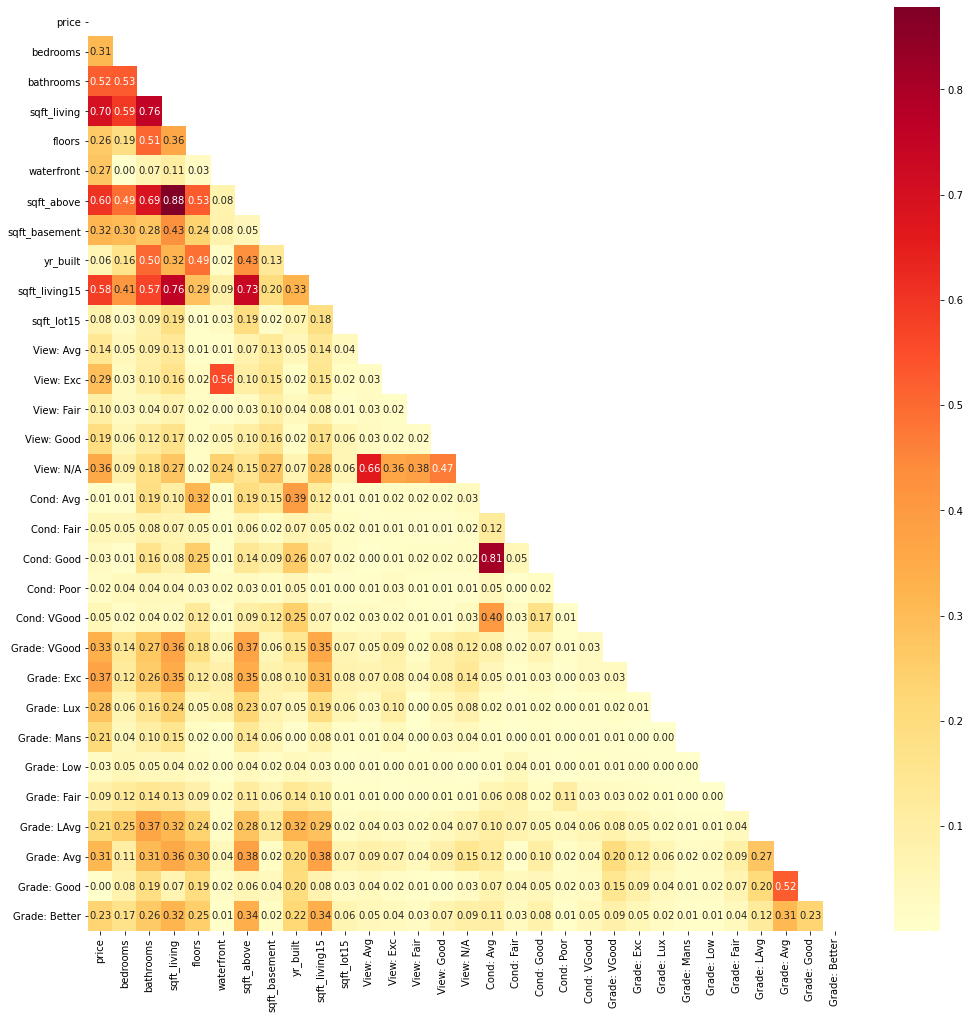

In [110]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(rename_drop.corr(), dtype=bool))
sns.heatmap(rename_drop.corr().abs(), annot=True, fmt=".2f", cmap="YlOrRd",mask=mask)
plt.savefig('Triang_comparison.png', dpi=600);

## Linear Regression Time!!

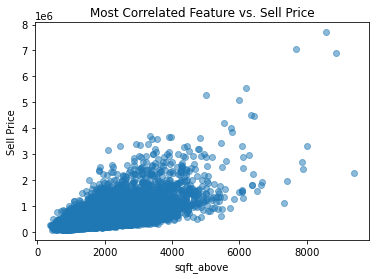

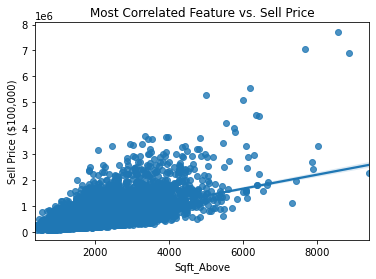

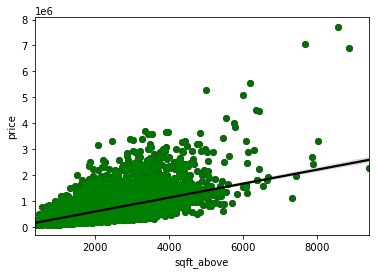

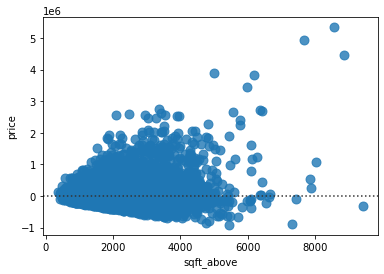

In [148]:
most_corr_feat = 'sqft_above'
fig, ax = plt.subplots()

ax.scatter(rename_drop[most_corr_feat], y_train, alpha=0.5)
ax.set_title("Most Correlated Feature vs. Sell Price")
ax.set_xlabel(most_corr_feat)
ax.set_ylabel('Sell Price')

fig, ax2 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat], y=y_train)
ax2.set_title("Most Correlated Feature vs. Sell Price")
ax2.set_xlabel(most_corr_feat.title())
ax2.set_ylabel('Sell Price ($100,000)')

fig, ax3 = plt.subplots()
sns.regplot(x=rename_drop[most_corr_feat],y=y_train, color="black")
ax3.scatter(rename_drop[most_corr_feat], y_train, alpha = 0.7,color="green");

fig, ax4 = plt.subplots()
sns.residplot(x=rename_drop[most_corr_feat], y=y_train,
              scatter_kws={"s": 80});